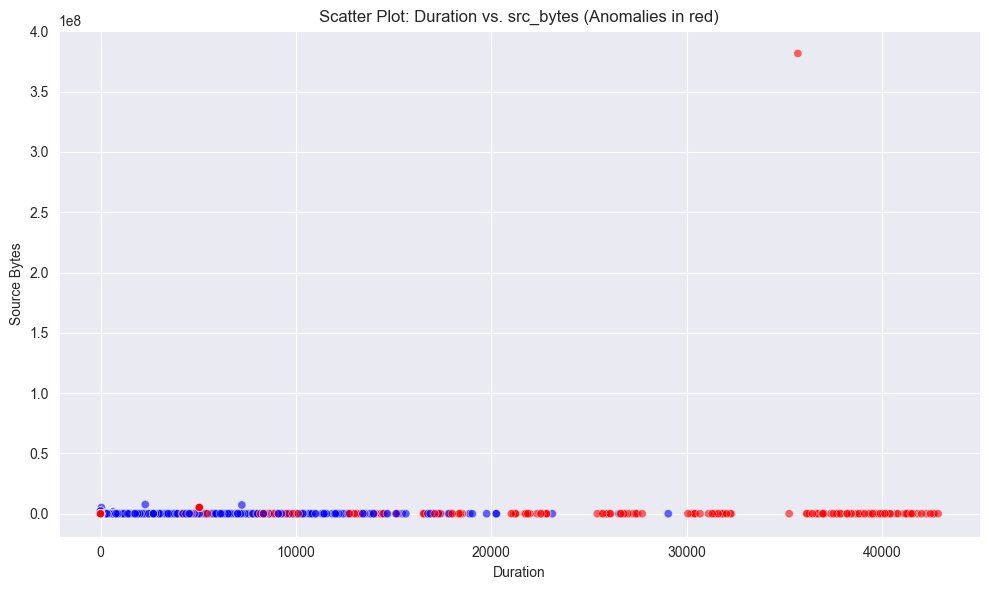

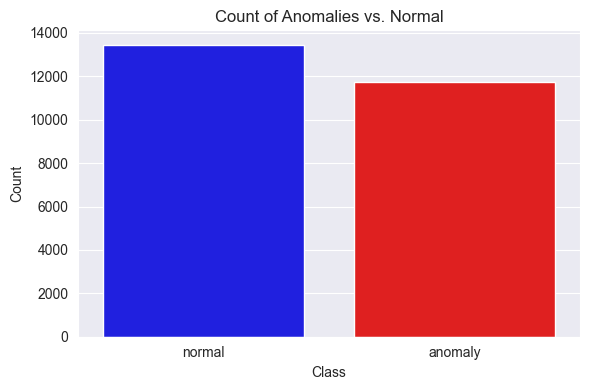

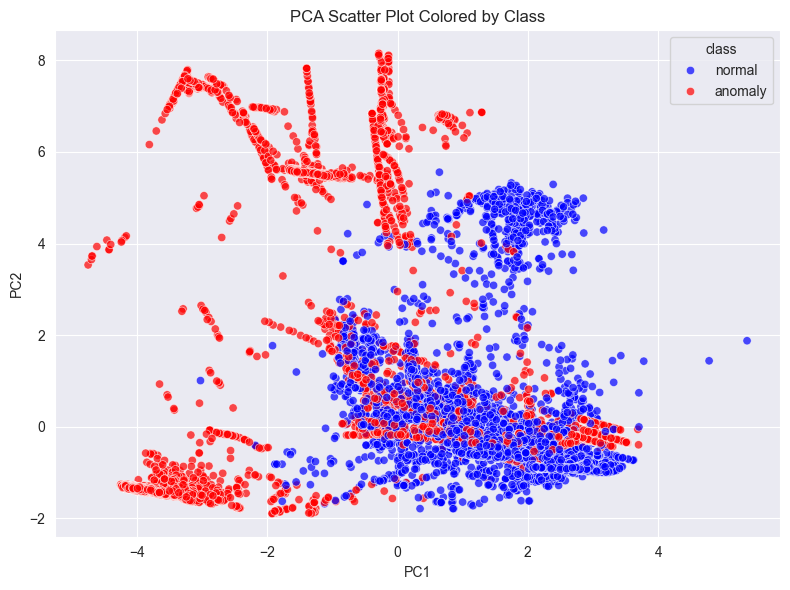

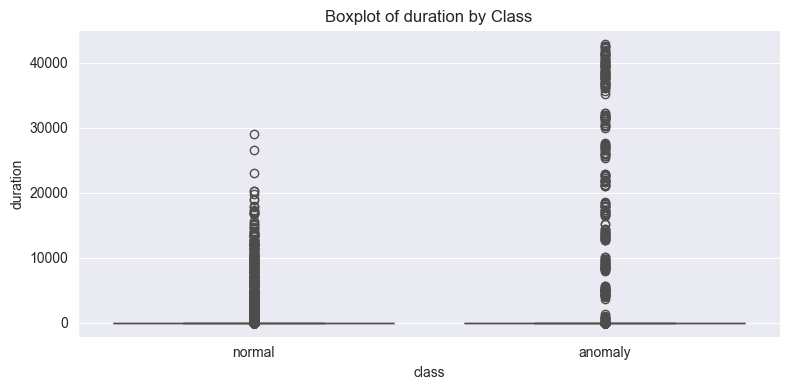

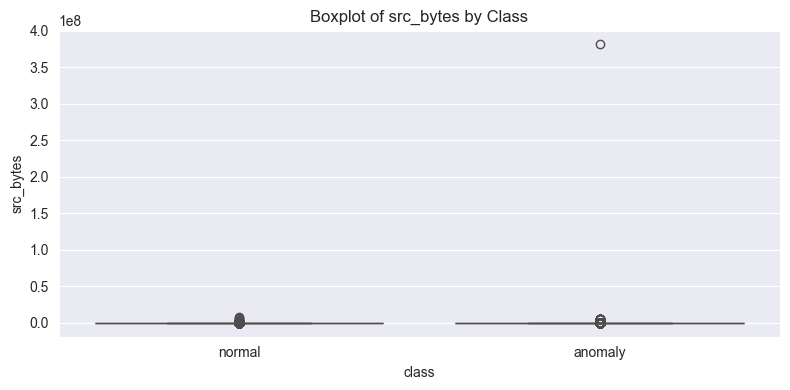

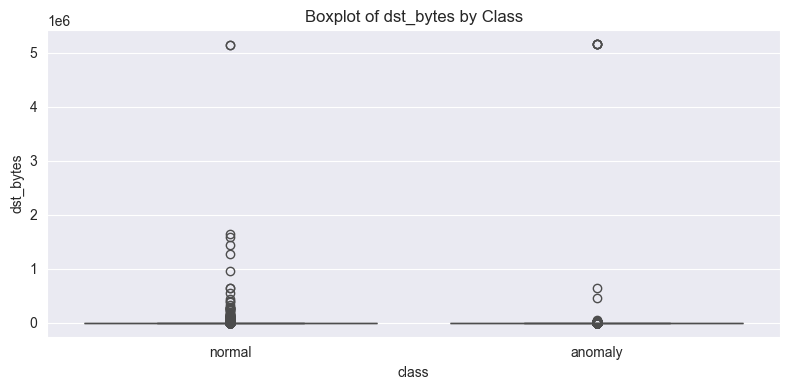

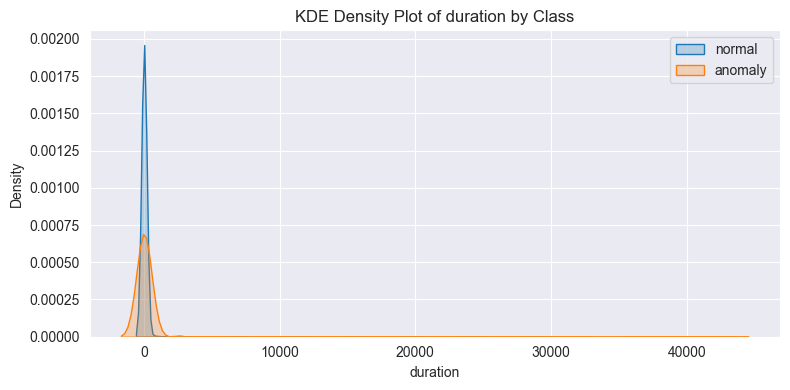

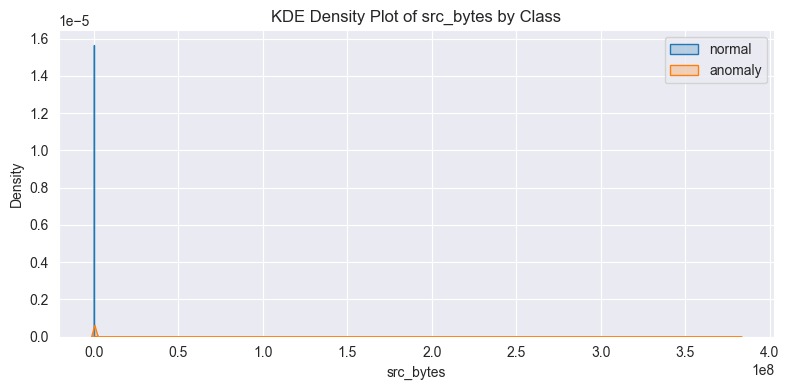

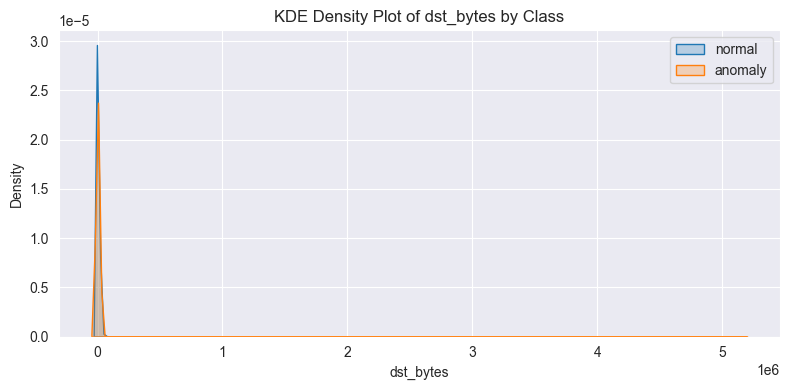

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def main():
    # Load data
    file_path = "Data/Train_data.csv"
    df = pd.read_csv(file_path)
    
    # Ensure the class column is lowercase for consistency
    if 'class' in df.columns:
        df['class'] = df['class'].str.lower()
    else:
        print("No 'class' column found in the dataset. Exiting.")
        return

    #Scatter Plot: Duration vs. src_bytes

    if 'duration' in df.columns and 'src_bytes' in df.columns:
        plt.figure(figsize=(10, 6))
        # Color anomalies red, normal blue
        df['color'] = df['class'].apply(lambda x: 'red' if x == 'anomaly' else 'blue')
        plt.scatter(df['duration'], df['src_bytes'], c=df['color'], alpha=0.6, edgecolors='w', linewidth=0.5)
        plt.xlabel("Duration")
        plt.ylabel("Source Bytes")
        plt.title("Scatter Plot: Duration vs. src_bytes (Anomalies in red)")
        plt.tight_layout()
        plt.show()

    #Count of Anomalies vs. Normal
    plt.figure(figsize=(6, 4))
    class_counts = df['class'].value_counts()
    sns.barplot(x=class_counts.index, y=class_counts.values,
                hue=class_counts.index,
                palette={'anomaly': 'red', 'normal': 'blue'}, dodge=False)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title("Count of Anomalies vs. Normal")
    plt.legend([], [], frameon=False)  # Remove the legend to mimic previous effect
    plt.tight_layout()
    plt.show()
    
    #PCA Scatter Plot Colored by Class
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'class' in numeric_cols:
        numeric_cols.remove('class')
    if numeric_cols:
        scaler = StandardScaler()
        numeric_data = scaler.fit_transform(df[numeric_cols])
        pca = PCA(n_components=2)
        pca_components = pca.fit_transform(numeric_data)
        pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
        pca_df['class'] = df['class']
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class',
                        palette={'anomaly': 'red', 'normal': 'blue'}, alpha=0.7)
        plt.title("PCA Scatter Plot Colored by Class")
        plt.tight_layout()
        plt.show()
    
    # 4. Grouped Boxplots and KDE Density Plots for Key Features
    # Select features that are likely important in distinguishing anomalies
    features_to_plot = []
    for feature in ['duration', 'src_bytes', 'dst_bytes']:
        if feature in df.columns:
            features_to_plot.append(feature)
    
    if features_to_plot:
        # Boxplots for each feature
        for feature in features_to_plot:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x='class', y=feature, data=df, hue='class',
                        palette={'anomaly': 'red', 'normal': 'blue'}, dodge=False)
            plt.title(f"Boxplot of {feature} by Class")
            plt.legend([], [], frameon=False)
            plt.tight_layout()
            plt.show()
            
        # KDE Density Plots for each feature
        for feature in features_to_plot:
            plt.figure(figsize=(8, 4))
            for cl in df['class'].unique():
                subset = df[df['class'] == cl]
                sns.kdeplot(subset[feature], fill=True, label=cl)
            plt.title(f"KDE Density Plot of {feature} by Class")
            plt.xlabel(feature)
            plt.legend()
            plt.tight_layout()
            plt.show()

if __name__ == '__main__':
    main()
